In [1]:
import re, string,os
from glob import glob as gb
import pandas as pd
from tqdm import tqdm
from collections import Counter
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib
from functions import *

base_path = "/media/ruben/OSDisk/Users/ruben.ros/Documents/GitHub/ParlaMintCase"

plotting.style_(n_var=12,pal='tab20')

In [2]:
def plot_diversity(language):
    df = data_loader.full(language,'preprocessed')
    df['date'] = [utils.find_date(x) for x in df['id']]
    df = utils.add_metadata(df,language)
    df['text'] = [re.sub(r'[^A-Za-z0-9 ]+', '', str(s)) for s in df['text']]

    months = sorted(list(set([x[:7] for x in df['date']])))
    months = utils.month_generator(months[0],months[-1])

    new_words_df = pd.DataFrame()

    vocab = set()
    d = []
    for c,month in enumerate(months):
        data = df[df['date'].str.contains(month)]
        texts = list(data['text'])
        words = [[w for w in str(t).split(' ')] for t in texts]
        words = Counter([item for sublist in words for item in sublist])

        if c == 0:
            vocab = set(dict(words).keys())
            continue 
        else:
            new_words = [[w,v] for w,v in dict(words).items() if w not in vocab and v >= 5 and w.isdigit() == False and len([c for c in w if c.isdigit() == True]) == 0]
            if len(new_words) > 5 and int(month[:4]) > 2019:
                new_words_df[month] = pd.DataFrame(new_words,columns=['w','v']).sort_values('v',ascending=False).reset_index(drop=True)['w'][:10]
            lnw = len(new_words)
            d.append([month,lnw])
            vocab = vocab | set(dict(words).keys())
    pd.DataFrame(d,columns=['x','y']).iloc[15:,:].plot.bar(x='x',y='y',figsize=(10,6),legend=False)

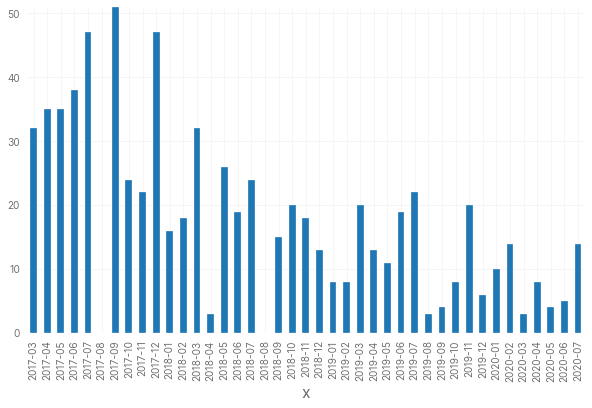

In [5]:
plot_diversity('pl')